<a href="https://colab.research.google.com/github/vir123-devf/Object_Recognition-using-Resnet50/blob/main/Object_Recognition_using_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset api

!kaggle competitions download -c cifar-10

In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
#Extacting the compresses Dtaset
from zipfile import ZipFile
dataset = "/content/cifar-10.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset is extacted')

dataset is extacted


In [ ]:
!pip install py7zr # installed py7zr to extact .7z files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 36.5 MB/s eta 0:00:00


In [ ]:
import py7zr
with py7zr.SevenZipFile('/content/train.7z', mode='r') as z:
    z.extractall()


In [ ]:
!ls # list all the files

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the **Dependencies**

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
print(len(filenames))

50000


In [ ]:
type(filenames)

list

In [ ]:
print(filenames[:5])
print(filenames[-5:]) # from this we understood that images are not ordered

['3610.png', '46901.png', '7625.png', '45671.png', '10045.png']
['24547.png', '22548.png', '40903.png', '17279.png', '43124.png']


# label processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv') # converting to pandas dataframe

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id']== 12504]

,id,label
12503,12504,ship


In [ ]:
labels_df.head(10) # labels are ordered

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [ ]:
#Assiging number for each class with one_hot_encoding
one_hot_labels = pd.get_dummies(labels_df['label'])

# converting to numpy array
one_hot_array = one_hot_labels.values
one_hot_labels

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
49995,False,False,True,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,True,False,False,False
49997,False,False,False,False,False,False,False,False,False,True
49998,False,True,False,False,False,False,False,False,False,False


In [ ]:
one_hot_array[0:7]

array([[False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False]])

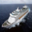

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/12504.png')
cv2_imshow(img)


In [ ]:
id_list = list(labels_df['id']) # making it for (for loop)

In [ ]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# Image Processing

In [ ]:
# Converting images to numpy arrays
train_folder = '/content/train/'
data =[]
for id in id_list:
  image = Image.open(train_folder + str(id)+'.png') # Image is from PILLOW Which is basically reading the file through path
  image = np.array(image)
  data.append(image)


In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
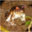

In [ ]:
data[0]

In [ ]:
x = np.array(data) # converting list to numpy array
y= one_hot_array

In [ ]:
print(type(y))
print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000, 10)


In [ ]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # random_state maintain the way of split whenever is runned

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


40,000- train_data

10,000 - test_data

In [ ]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled

array([[[[0.07058824, 0.07058824, 0.06666667],
         [0.08627451, 0.09019608, 0.0745098 ],
         [0.14509804, 0.14901961, 0.12941176],
         ...,
         [0.75686275, 0.84313725, 0.89411765],
         [0.74117647, 0.82352941, 0.8745098 ],
         [0.74901961, 0.83529412, 0.88627451]],

        [[0.09019608, 0.09803922, 0.08235294],
         [0.10196078, 0.10588235, 0.08235294],
         [0.1254902 , 0.12156863, 0.09019608],
         ...,
         [0.47058824, 0.56470588, 0.50196078],
         [0.41568627, 0.50980392, 0.44705882],
         [0.47843137, 0.57254902, 0.50980392]],

        [[0.09411765, 0.11764706, 0.08627451],
         [0.09019608, 0.09019608, 0.05882353],
         [0.16470588, 0.14901961, 0.11372549],
         ...,
         [0.33333333, 0.41568627, 0.25490196],
         [0.33333333, 0.41568627, 0.25490196],
         [0.3372549 , 0.41960784, 0.25882353]],

        ...,

        [[0.70196078, 0.58431373, 0.46666667],
         [0.69019608, 0.56862745, 0.45490196]

array([[[ 18,  18,  17],
        [ 22,  23,  19],
        [ 37,  38,  33],
        ...,
        [193, 215, 228],
        [189, 210, 223],
        [191, 213, 226]],

       [[ 23,  25,  21],
        [ 26,  27,  21],
        [ 32,  31,  23],
        ...,
        [120, 144, 128],
        [106, 130, 114],
        [122, 146, 130]],

       [[ 24,  30,  22],
        [ 23,  23,  15],
        [ 42,  38,  29],
        ...,
        [ 85, 106,  65],
        [ 85, 106,  65],
        [ 86, 107,  66]],

       ...,

       [[179, 149, 119],
        [176, 145, 116],
        [179, 149, 119],
        ...,
        [172, 150, 121],
        [186, 161, 130],
        [192, 164, 131]],

       [[178, 150, 120],
        [172, 145, 115],
        [176, 149, 119],
        ...,
        [197, 168, 134],
        [194, 164, 131],
        [192, 163, 128]],

       [[174, 147, 116],
        [174, 147, 116],
        [177, 150, 119],
        ...,
        [195, 163, 133],
        [192, 162, 132],
        [192, 162, 132]]], dtype=uint8)
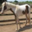

In [ ]:
x_train[0]

# Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras # keras is wrapper of tensorflow,it make implemention easy
from keras.layers import Dense,Flatten

In [ ]:
# setting the layers of nn
no_of_classes =10
model = keras.Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(64,activation='relu'))
model.add(Dense(no_of_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile nn
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
# Training the neural network(nn) # 1 epochs means 1 forward propagation and 1 backward propagation
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2644 - loss: 2.0494 - val_accuracy: 0.3400 - val_loss: 1.8581
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3510 - loss: 1.8223 - val_accuracy: 0.3860 - val_loss: 1.7597
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3838 - loss: 1.7443 - val_accuracy: 0.3947 - val_loss: 1.7282
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3956 - loss: 1.7014 - val_accuracy: 0.3810 - val_loss: 1.7476
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4028 - loss: 1.6755 - val_accuracy: 0.4105 - val_loss: 1.6784
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4145 - loss: 1.6472 - val_accuracy: 0.3968 - val_loss: 1.6817
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4137 - loss: 1.6472 - val_accuracy: 0.4092 - val_loss: 1.7020
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4232 - loss: 1.6321 - 

The accuray is low so,we use pretrained models like ResNet 50.


In [ ]:
# ResNet 50
# importing dependicies
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
# cnn -- has convolutional layers and pooling layers
convolutional_base = ResNet50(weights ='imagenet',include_top=False,input_shape=(256,256,3))
# imagenet is dataset containing 40 million images on which model is trained and weights are found and Stored in weights variable
# include_top = False --> it drop the output layer (containg many neuron) but we want only 10 neuron in output layer as no_of_classes =  10
# pre-trained cnn model(ResNet50) is pre-trained on 256X256 coloured images
convolutional_base.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
no_of_classes = 10
model = Sequential()
model.add(layers.UpSampling2D((2,2))) # it samples 32X32 image to 64X64 image
model.add(layers.UpSampling2D((2,2))) # it samples 64x64 image to 128X128 image
model.add(layers.UpSampling2D((2,2))) # it samples 128x128 image to 256x256 image -- which is required for ResNet50
model.add(convolutional_base)
model.add(layers.Flatten()) # converts 32x32 to 1x1024(1 dimensional conversion)
model.add(layers.BatchNormalization()) # normalizing after each layer to make processing much faster
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5)) # Dropout will make some neuron turn off to reduce the risk of overfitting Becoz nn trends to overfit generally
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5)) # Dropout will make some neuron turn off to reduce the risk of overfitting Becoz nn trends to overfit generally
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes,activation='softmax'))



In [ ]:
# compiling the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss ='categorical_crossentropy',metrics=['acc'])

In [ ]:
# training the model with cifar 10 dataset
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5) # it will take 35min approx

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 383s 340ms/step - acc: 0.3111 - loss: 2.0709 - val_acc: 0.7573 - val_loss: 0.8894
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 390s 347ms/step - acc: 0.6532 - loss: 1.1188 - val_acc: 0.8850 - val_loss: 0.5125
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 381s 339ms/step - acc: 0.7946 - loss: 0.7684 - val_acc: 0.9072 - val_loss: 0.3847
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 346ms/step - acc: 0.8589 - loss: 0.5967 - val_acc: 0.9212 - val_loss: 0.3143
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 347ms/step - acc: 0.9027 - loss: 0.4634 - val_acc: 0.9275 - val_loss: 0.2711


# run these cells and get plots

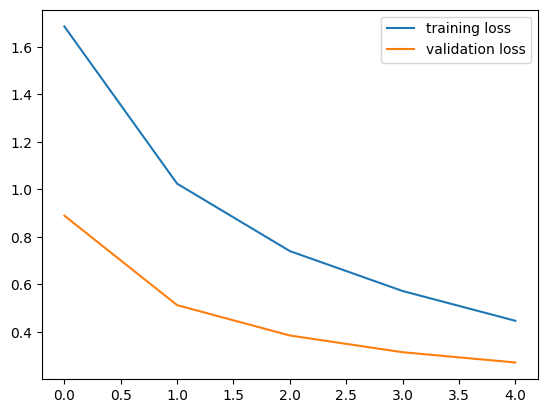

In [ ]:

plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

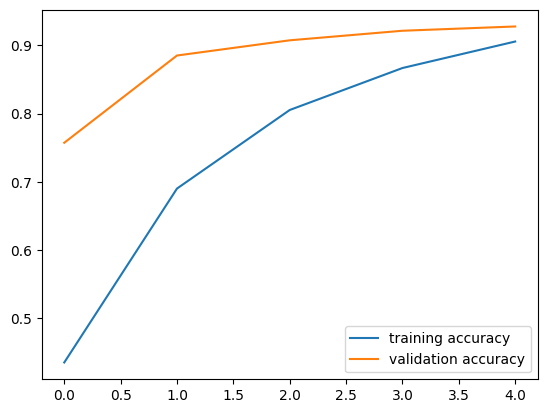

In [ ]:
plt.plot(history.history['acc'],label='training accuracy')
plt.plot(history.history['val_acc'],label = 'validation accuracy')
plt.legend()
plt.show()

In [ ]:
y_prob = model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step


In [ ]:
yp = y_prob.argmax(axis=1)
yp

array([6, 7, 3, ..., 5, 7, 6])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.argmax(axis=1),yp) # if you increase the number of epochs,you can get better accuracy

0.933

Prediction on web images

Enter the path of downloaded image: /content/United_Airlines_Boeing_777-200_Meulemans.jpg


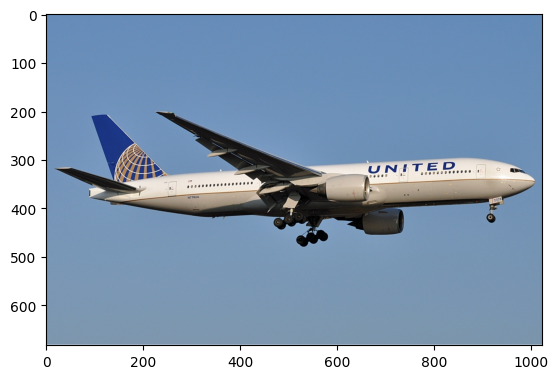

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[0]
The image represent :  airplane


In [ ]:
# predicting for downloaded image from website-
path = input("Enter the path of downloaded image: ")
img2 = mpimg.imread(path)
imgplt = plt.imshow(img2)
plt.show()

img1 = Image.open(path)
img1 = img1.resize((32, 32)) # as we are Upsampling 3 times in the model-- so,the size become 256x256pixel
img1 = img1.convert('RGB')
img1 = np.array(img1)
img1 = img1 / 255.0  # optional depending on model preprocessing


# Add batch dimension ---> important step
img1 = np.expand_dims(img1, axis=0)
img1.shape

# Predict
y_p = model.predict(img1)
y_predicted = y_p.argmax(axis=1)
print(y_predicted)
dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
print("The image represent : ",dict[y_predicted[0]])

Enter the path of downloaded image: /content/download.jpg


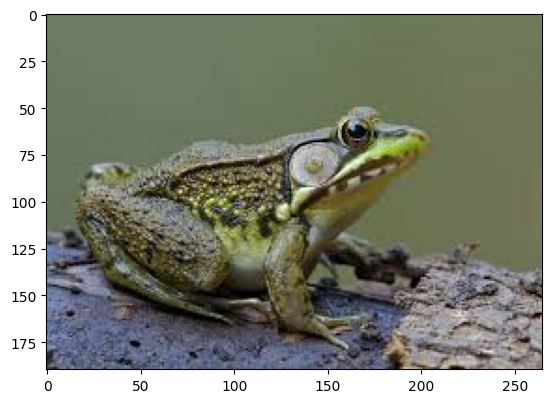

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[6]
The image represent :  frog


In [ ]:
# predicting for downloaded image from website-
path = input("Enter the path of downloaded image: ")
img2 = mpimg.imread(path)
imgplt = plt.imshow(img2)
plt.show()

img1 = Image.open(path)
img1 = img1.resize((32, 32)) # as we are Upsampling 3 times in the model-- so,the size become 256x256pixel
img1 = img1.convert('RGB')
img1 = np.array(img1)
img1 = img1 / 255.0  # optional depending on model preprocessing


# Add batch dimension ---> important step
img1 = np.expand_dims(img1, axis=0)
img1.shape

# Predict
y_p = model.predict(img1)
y_predicted = y_p.argmax(axis=1)
print(y_predicted)
dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
print("The image represent : ",dict[y_predicted[0]])